# Equations différentielles

Modèle proie prédateur (Lotka Volterra) :
$$ \begin{matrix} \dot x_1 & = & x_1 ( \alpha - \beta x_2 ) \\ \dot x_2 & = & - x_2 ( \gamma - \delta x_2 )  \end{matrix}$$

On définit  :
$$
\begin{array}{ccccc}
f & : & \mathbb{R}^2 & \to & \mathbb{R}^2 \\
  & & (x_1,x_2) & \mapsto & \begin{pmatrix} x_1(\alpha - \beta x_2)\\ x_2(\gamma - \delta x_1) \end{pmatrix}
\end{array}
$$

En notant $X=\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$ on a $ f (X)= \dot X $


In [1]:
# On initialise les blocs python : 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#On définit les paramètres du système
alpha = 2e-1
beta = 1e-1
gamma = 2e-1
delta = 1e-1

In [3]:
def f(t, x, y): #equation de Lotka-Volterra, on separe x et y pour simplifier le code, on a (x,y)=X
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

# Question 1:
## Signification physique des paramètres:
$\alpha$ est le taux de reproduction des proies : plus il y en a, plus elles se reproduisent.  
$\beta$ est le taux de prédation : plus il est grand, plus les proies diminuent.  
$\gamma$ est le taux de mortalité des prédateurs : il traduit la mortalité naturelle des prédateurs
$\delta$ est le nombre de proies disponibles par prédateur : plus il est grand, plus les prédateurs se reproduisent lorqu'ils mangent. 

## Points d'équilibre:
Pour trouver les points d'équilibre du système, on résout:
$$
\left\{
    \begin{array}{ll}
        x_1(\alpha - \beta x_2) = 0 \\
        x_2(\gamma - \delta x_1) = 0 
    \end{array}
\right.
$$
ce qui donne comme solution en particulier le point $(0, 0)$ et l'unique point sur $\mathbb{R_+^*}^2$ : $\bar{x} = $ $(\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$

# Question 2

## Champ de vecteurs

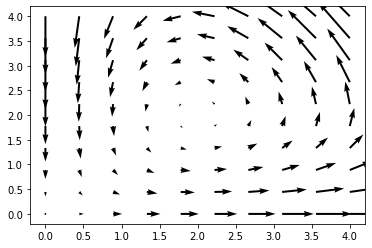

In [4]:
x=np.linspace(0,4,10)
y=np.linspace(0,4,10)
Xval,Yval=np.meshgrid(x,y)
plt.figure()
Xp=f(0,Xval,Yval)
plt.quiver(Xval,Yval,Xp[0,:,:],Xp[1,:,:])
plt.show()

Les solutions vont tourner autour du du point d'équilibre $\overline x$.

## Portrait de phase

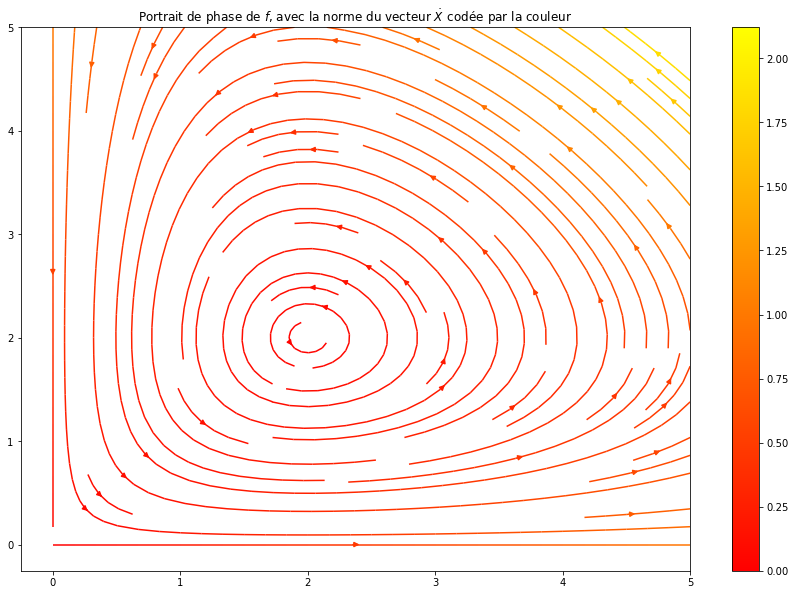

In [5]:
fig = plt.figure(figsize= (15, 10))
Y, X = np.mgrid[0:5:1000j, 0:5:1000j]
U, V = f(0, X, Y)
fig.colorbar(plt.streamplot(X, Y, U, V, color=np.sqrt(U**2+V**2), cmap="autumn").lines)
plt.title(r"Portrait de phase de $f$, avec la norme du vecteur $ \dot X $ codée par la couleur")
plt.show()

# Question 3

Les composantes de $f$ sont polynomiales donc elle est continue et continuement différentiable (par rapport à x).  
Par le théorème de Cauchy-Lipschitz, le solution maximale d'un problème de Cauchy sur l'équation de Lokta-Volterra est unique.  

Soit $x_0 = (x_{10}, x_{20}) \in \mathbb{R_+^*}^2$ et $x$ une solution de l'équation de Lokta-Volterratelle que $x(t_0) = x_0$.
Supposons qu'il existe $t_1$ tel que $x(t_1)_1 = 0$ et $x(t_1)_2 > 0$.  
La fonction $y(t) = (0, y_2(t))$ où $ \dot y_2 = \gamma y_2  $ et $y(t_1)_2 =  x(t_1)_2$ est solution du problème de Cauchy : 
$$
\left\{
    \begin{array}{ll}
        \dot x_1 = x_1(\alpha - \beta x_2) \\
        \dot x_2 = x_2(\gamma - \delta x_1) \\
        x(t_1) = (0, x(t_1)_2)
    \end{array}
\right.
$$
$x$ est aussi solution du même de problème de Cauchy donc par unicité des solutions maximales : $ x = y $ d'où $x_1 = 0$, ce qui est absurde car $x_{10} \neq 0$.  
D'où les solutions de Lokta-Volterra ne peuvent pas couper l'axe des abscisses et de manière symétrique (en appliquant le même raisonnement) l'axe des ordonnées. Ainsi $x$ reste dans le plan $\mathbb{R_+^*}^2$.

# Question 4

In [6]:
def H(x, y):
    return delta*x - gamma*np.log(x) + beta*y - alpha*np.log(y)

Calculons la dérivée de H pour $x = (x_1, x_2)$ une solution de l'équation de Lokta-Volterra initialisée dans $\mathbb{R_+^*}^2$ définie sur un intervalle $I$ de $\mathbb{R}$.  
On a pour tout $t$ $\in$ $I$:
$$
\frac{dH(t)}{dt} = \delta \dot x_1 - \gamma \frac{\dot x_1}{x_1} + \beta \dot x_2 - \alpha \frac{\dot x_2}{x_2}
$$

ce qui donne en remplaçant $\dot x$ et $\dot y$ par leurs expressions dans l'équation de Lokta-Volterra, 
$$
\frac{dH(t)}{dt} = -\delta x_1(\alpha - \beta x_2) + \gamma (\alpha - \beta x_2) + \beta x_2(\gamma - \delta x_1) - \alpha (\gamma - \delta x_1)
$$
d'où:
$$
\frac{dH(t)}{dt} = 0
$$
H est donc constant sur les solutions de l'équation de Lokta-Volterra.

Notons $x$ une solution de Lokta-Volterra définie sur $\mathbb{R_+^*}^2$.  
Par le théorème du domaine maximale d'existence, soit $x$ diverge en temps fini, soit $x$ est définie sur $\mathbb{R}$. Or si $x$ diverge alors l'un de ses composantes diverge aussi et H aussi, ce qui est impossible car H est constant dans le temps. 


# Question 5

In [7]:
def courbes(f,xmax,ymax,levels):
    x=np.linspace(0,xmax,100)
    y=np.linspace(0,ymax,100)


    X, Y = np.meshgrid(x, y)
    Z = H(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlim([0,xmax])
    plt.ylim([0,ymax])
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    plt.scatter(gamma/delta, alpha/beta)
    plt.text(1.05*gamma/delta, alpha/beta,r"$\overline {x}$",size=14)


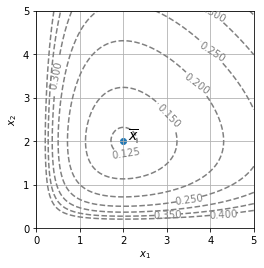

In [8]:
xmax=5
ymax=5
levels=[0.125,0.15,0.2,0.25,0.3,0.35,0.4]
courbes(f,xmax,ymax,levels)
plt.show()

La question 4 donne qu'une solution suit une courbe de niveau de $H$.

Si on part d'une condition intitiale proche de $ \overline x$, on reste arbitrairement proche de $\overline x$ car les solutions tournent autour du point d'équilibre (ou du moins on est sur un domaine dont la distance à $ \overline x$ est bornée), donc $\overline x$ est stable au sens de la définition de stabilité : $$ \forall \epsilon >0, \exists \eta \ | \ \forall x_0 \ | \ \|\bar x - x_0 \| < \eta , \forall t \in \mathbb R , \|\bar x - x(t) \| < \epsilon $$
En prenant aussi en compte le champ de vecteurs (question 2) on voit que les solutions "tournent" autour de $ \overline x$ dans le sens anti-horaire, elles seront donc periodiques.

# Question 6

In [9]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = np.linspace(t0, tf, int((tf-t0)/dt))
    x = np.zeros(shape=(len(x0), len(t)))
    x[:, 0] = x0
    
    for i in range(len(t)-1):
        x[:, i+1] = x[:, i] + dt * f(t, *x[:, i])
    return t, x

## Test sur des solutions connus

On commence par tester euler explicite sur l'équation différentielle $\dot x = x$ dont la solution est la fonction exponentielle.

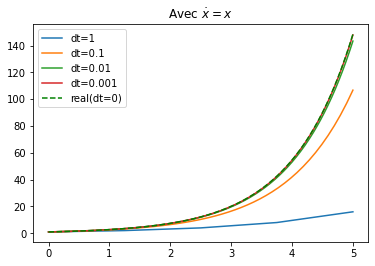

In [10]:
def fexp(t,x):
    return x

t,x=solve_euler_explicit(fexp,[1],1,0,5)
plt.plot(t,x.T)
t,x=solve_euler_explicit(fexp,[1],0.1,0,5)
plt.plot(t,x.T)
t,x=solve_euler_explicit(fexp,[1],0.01,0,5)
plt.plot(t,x.T)
t,x=solve_euler_explicit(fexp,[1],0.001,0,5)
plt.plot(t,x.T)
plt.plot(t,np.exp(np.array(t)),'g--')
plt.legend(["dt=1","dt=0.1","dt=0.01","dt=0.001","real(dt=0)"])
plt.title(r"Avec $\dot x= x$")
plt.show()

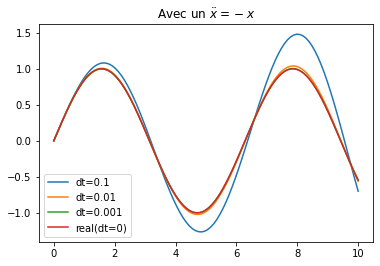

In [11]:

def sinus(t, x, y):
    return np.array([y,-x])
t,x=solve_euler_explicit(sinus, [0, 1], 1e-1, 0, 10)
plt.plot(t,x[0,:])
t,x=solve_euler_explicit(sinus, [0, 1], 1e-2, 0, 10)
plt.plot(t,x[0,:])
t,x=solve_euler_explicit(sinus, [0, 1], 1e-3, 0, 10)
plt.plot(t,x[0,:])
plt.plot(t, np.sin(t))
plt.legend(["dt=0.1","dt=0.01","dt=0.001","real(dt=0)"])
plt.title(r"Avec un $\ddot x = -x$")
plt.show()

## Question 7

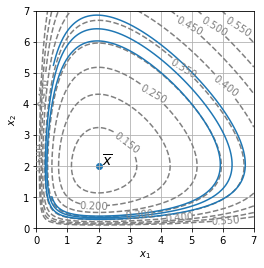

In [12]:


xmax=7
ymax=7
levels=[.15,0.2,0.25,0.3,0.35,.4,.45,0.5,.55]

courbes(f,xmax,ymax,levels)

t, x = solve_euler_explicit(f, [1/2, 1], 1e-1, 0, 100)
plt.plot(x[0, :], x[1, :])

plt.show()

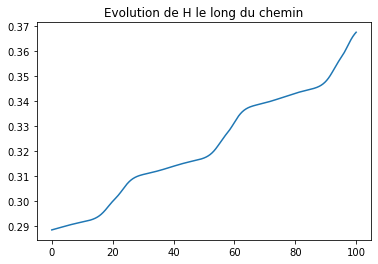

In [13]:
plt.figure()
plt.plot(t, H(x[0, :], x[1, :]))
plt.title("Evolution de H le long du chemin")
plt.show()

On voit qu'en temps long $H$ augmente, signe que l'on accumule de l'erreur par rapport à une solution exacte (pour laquelle $H$ resterait constante). La solution trouvée n'est donc pas fidèle a la réalité (on finit ici avec 28% d'erreur sur $H$ en 100 pas de temps). On pourrait diminuer $\Delta t$ pour atténuer cet effet mais il resterait toujours présent. 

# Question 8

In [14]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax=100):
    
    t = np.linspace(t0, tf, int((tf-t0)/dt))
    x = np.zeros(shape=(len(x0), len(t)))
    x[:, 0] = x0
    
    for i in range(len(t)-1):
        
        def F(x_i):
            return x[:,i] + dt*f(t[i+1], *x_i)
            
        result = x[:,i] + dt*f(t[i], *x[:,i])
        for _ in range(itermax):
            result = F(result)
        x[:, i+1] = result
        
    return t, x

## Test sur des solutions connues

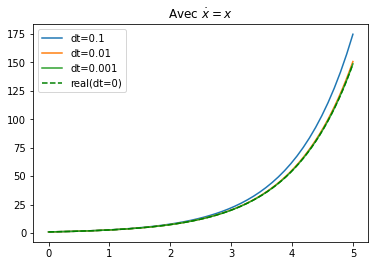

In [15]:
def fexp(t,x):
    return x

t,x=solve_euler_implicit(fexp,[1],0.1,0,5)
plt.plot(t,x.T)
t,x=solve_euler_implicit(fexp,[1],0.01,0,5)
plt.plot(t,x.T)
t,x=solve_euler_implicit(fexp,[1],0.001,0,5)
plt.plot(t,x.T)
plt.plot(t,np.exp(np.array(t)),'g--')
plt.legend(["dt=0.1","dt=0.01","dt=0.001","real(dt=0)"])
plt.title(r"Avec $\dot x= x$")
plt.show()

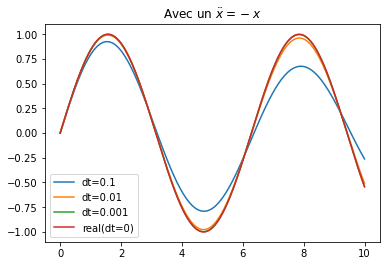

In [16]:

def sinus(t, x, y):
    return np.array([y,-x])
t,x=solve_euler_implicit(sinus, [0, 1], 1e-1, 0, 10)
plt.plot(t,x[0,:])
t,x=solve_euler_implicit(sinus, [0, 1], 1e-2, 0, 10)
plt.plot(t,x[0,:])
t,x=solve_euler_implicit(sinus, [0, 1], 1e-3, 0, 10)
plt.plot(t,x[0,:])
plt.plot(t, np.sin(t))
plt.legend(["dt=0.1","dt=0.01","dt=0.001","real(dt=0)"])
plt.title(r"Avec un $\ddot x = -x$")
plt.show()

## Test sur Lotka-Volterra

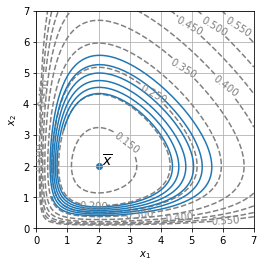

In [17]:


xmax=7
ymax=7
levels=[.15,0.2,0.25,0.3,0.35,.4,.45,0.5,.55]

courbes(f,xmax,ymax,levels)

t, x = solve_euler_implicit(f, [1/2, 1], 1e-1, 0, 200)
plt.plot(x[0, :], x[1, :])

plt.show()

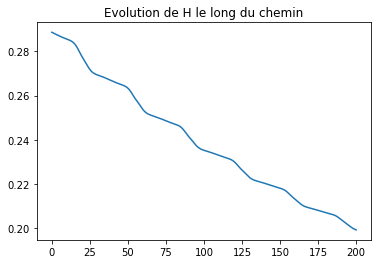

In [18]:
plt.figure()
plt.plot(t, H(x[0, :], x[1, :]))
plt.title("Evolution de H le long du chemin")
plt.show()

On voit quii, en temps long $H$ diminue, signe que l'on accumule de l'erreur par rapport à une solution exacte (pour laquelle $H$ resterait constante) : on chute vers $\bar x$. La solution trouvée n'est donc pas fidèle a la réalité (on finit ici avec 29% d'erreur sur $H$ en 200 pas de temps). On pourrait diminuer $\Delta t$ pour atténuer cet effet mais il resterait toujours présent. 

# Question 9

Etant donné que $H$ est constant sur les solutions de l'équation de Lokta-Volterra, il est égal à $H(x(0))$, donc toute solution de l'équation de Lokta-Volterra est solution de celle donnée en énoncée que l'on notera $(E)$.  

Réciproquement, soit $x$ une solution de $(E)$. Notons $g := H(x(-)) - H(x(0))$ une fonction de $t$ et montrons que g est constant au cours du temps. 
En dérivant par rapport au temps on a que :
$$
g' = g*h
$$
où $h : x_1,x_2 \mapsto  u_1(x_1,x_2) \times ( \frac{\gamma}{x_1} - \delta) + u_2(x_1,x_2) \times ( \frac{\alpha}{x_2} - \beta) $.  
Ainsi $g$ est une fonction d'une variable, solution d'une équation différentielle linéaire homogène à coefficients continus d'ordre 1 et telle que $g(0) = 0$.  
D'où $g$ est nulle sur $\mathbb{R}$.

Soit $x_{LV}$ la solution de l'équation de Lotka-Volterra telle que $x_{LV}(0) = x(0)$.
$(E)$ est donc la même que l'équation de Lokta-Volterra car $H$ est constante pour une solution de $(E)$.  
$x$ et $x_{LV}$ sont solutions de l'équation de Lokta-Volterra et égales un point et donc égales par unicité des solutions de Lokta-Volterra.
Le sens réciproque et l'équivalence sont ainsi montrés.  

# Question 10

Calculons la dérivée de $H$ le long des solutions du nouveau système:
$$
\frac{d(H(x(t)) - H_0)}{dt} = \delta \dot x_1 - \gamma \frac{\dot x_1}{x_1} + \beta \dot x_2 - \alpha \frac{\dot x_2}{x_2}
$$)
d'où en remplaçant par les dérivées découlant du système, après simplification:
$$
\frac{d(H(x(t)) - H_0)}{dt} = \left[ u_1( \frac{\gamma}{x_1} - \delta) + u_2( \frac{\alpha}{x_2} - \beta) \right] (H(x(t) - H_0)
$$
Ainsi en choississant 
$$
\begin{array}{ccccc}
u & : & \mathbb{R_+^*}^2 & \to & \mathbb{R}^2 \\
  & & (x_1,x_2) & \mapsto & k\begin{pmatrix} \delta - \frac{\gamma}{x_1}\\ \beta - \frac{\alpha}{x_2} \end{pmatrix}
\end{array}
$$
on obtient la forme recherchée pour $k \in \mathbb{R}$ car
$$
\| \nabla H(x(t)) \|^2 = \left(\delta - \frac{\gamma}{x_1} \right) ^2 + \left(\beta - \frac{\alpha}{x_2} \right) ^2
$$

Supposons que $x$ solution du nouveau système reste à distance strictement positive de $\bar{x}$.
D'après l'expression précédente on a l'équivalence suivante sur l'ensemble de définition de $x$:
$$
\forall t \in \mathbb{R}, \| \nabla H(x(t)) \| = 0 \iff x(t) = \bar{x}
$$
ce qui justifie que la norme du gradient de $H$ ne s'annule pas sur $x$ (sinon $x$ = $\bar{x}$).  
De plus, $x$ appartient à une ligne de niveau de $H$ qui est fermée (au sens topologique) comme image réciproque d'un singleton (fermé) par $H$ qui est continue sur $\mathbb{R_+^*}^2$.  
D'où $x$ ne peut pas se rapprocher trop près du point $\bar{x}$ qui n'est pas sur sa ligne de niveau et donc il existe $c > 0 $ tel que 
$$
\forall t \in \mathbb{R}, \| \nabla H(x(t)) \| \geqslant c > 0
$$
On a alors 
$$
\frac{d(H(x(t)) - H_0)}{dt} \leqslant -kc^2 (H(x(t)) - H_0)
$$
Par le lemme de Grönwall démontré en exercice, 
$$
H(x(t)) - H_0 \leqslant (H(x(0)) - H_0) * e^{-kc^2t} 
$$
D'où $H(x(t))$ converge exponentiellement vers $H_0$ en temps infini.

# Question 11

Afin de rendre les schémas d'euler performants pour le système de Lotka-Volterra, on modifie la fonction $f$ en ajoutant le terme $u(H - H_0)$ pour forcer les solutions à rester sur les lignes de niveaux de $H$.

## Modification des schémas d'euler

In [19]:
k = 1 #valeur arbitraire pour le moment

def u(x,y, k):
    return np.array([k*(delta - gamma/x), k*(beta - alpha/y)])

In [20]:
def solve_euler_explicit_modified(f, x0, dt, t0, tf, k = 1):
    t = np.linspace(t0, tf, int((tf-t0)/dt))
    x = np.zeros(shape=(len(x0), len(t)))
    x[:, 0] = x0
    
    def f_modified(t, *x):
        return f(t, *x) - u(*x, k = k)*(H(*x) - H(*x0))

    for i in range(len(t)-1):
        x[:, i+1] = x[:, i] + dt * f_modified(t, *x[:, i])
    return t, x

In [21]:
def solve_euler_implicit_modified(f, x0, dt, t0, tf, itermax=100, k = 1):
    
    t = np.linspace(t0, tf, int((tf-t0)/dt))
    x = np.zeros(shape=(len(x0), len(t)))
    x[:, 0] = x0
    
    def f_modified(t, *x):
        return f(t, *x) - u(*x, k = k)*(H(*x) - H(*x0))

    for i in range(len(t)-1):

        def F(x_i):
            return x[:,i] + dt*f_modified(t[i+1], *x_i)
            
        result = x[:,i] + dt*f(t[i], *x[:,i])
        for _ in range(itermax):
            result = F(result)
        x[:, i+1] = result
        
    return t, x

## Test d'euler explicite

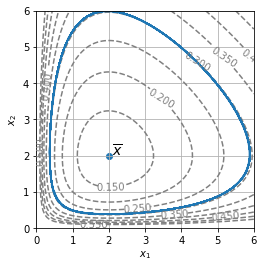

In [26]:
courbes(f,6,6,levels)
t, x = solve_euler_explicit_modified(f, [1/2, 1], 1e-1, 0, 500)
plt.plot(x[0, :], x[1, :])

x_bis, y_bis = np.linspace(1, 5, 100), np.linspace(1, 5, 100)
X, Y = np.meshgrid(x_bis, y_bis)


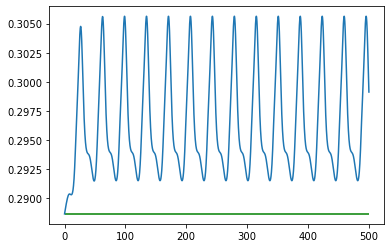

In [27]:
plt.plot(t, H(x[0, :], x[1, :]))
plt.hlines(H(1/2, 1), 0, 500, color = 'g')

Le schéma d'Euler explicite ne diverge plus mais la courbe finale est sur une courbe de niveau légèrement supérieure à celle attendue comme l'atteste le tracé de l'evolution de $H$ (deuxième courbe en bleu) et de la valeur attendue (en vert).

## Test d'euler implicite

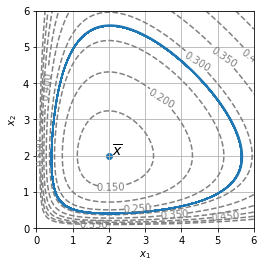

In [29]:
courbes(f,6,6,levels)
t, x = solve_euler_implicit_modified(f, [1/2, 1], 1e-1, 0, 500)
plt.plot(x[0, :], x[1, :])

x_bis,  y_bis = np.linspace(1, 5, 100), np.linspace(1, 5, 100)
X, Y = np.meshgrid(x_bis, y_bis)

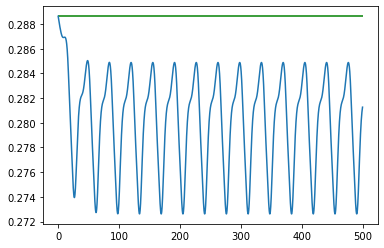

In [31]:
plt.plot(t, H(x[0, :], x[1, :]))
plt.hlines(H(1/2, 1), 0, 500, color = 'g')

plt.show()

Le schéma d'Euler implicite ne diverge plus mais la courbe finale est sur une courbe de niveau légèrement inférieure à celle attendue (mêmes graphes que pour euler explicite).

## Influence de la valeur de $k$

In [34]:
def test_k_explicit(k_test, x_test, y_test, pas = 1e-1, debut = 0, fin = 500):

    plt.figure(figsize = (15, 6))
    t, x = solve_euler_explicit_modified(f, [x_test, y_test], pas, debut, fin, k = k_test)
    plt.plot(x[0, :], x[1, :])

    x_bis,  y_bis = np.linspace(1, 5, 100), np.linspace(1, 5, 100)
    X, Y = np.meshgrid(x_bis, y_bis)
    plt.contour(
            X, Y, H(X,Y), colors="grey", linestyles="dashed",
            levels= [H(x_test, y_test)]
        )
    plt.show()
    plt.figure(figsize = (15, 6))
    plt.plot(t, H(x[0, :], x[1, :]))
    plt.hlines(H(x_test, y_test), 0, 500, color = 'g')
    plt.show()


def test_k_implicit(k_test, x_test, y_test, pas = 1e-1, debut = 0, fin = 500):
    plt.figure(figsize = (15, 6))
    t, x = solve_euler_implicit_modified(f, [x_test, y_test], pas, debut, fin, k = k_test)
    plt.plot(x[0, :], x[1, :])

    x_bis,  y_bis = np.linspace(1, 5, 100), np.linspace(1, 5, 100)
    X, Y = np.meshgrid(x_bis, y_bis)
    plt.contour(
            X, Y, H(X,Y), colors="grey", linestyles="dashed",
            levels= [H(x_test, y_test)]
        )
    plt.show()
    plt.figure(figsize = (15, 6))
    plt.plot(t, H(x[0, :], x[1, :]))
    plt.hlines(H(x_test, y_test), 0, 500, color = 'g')
    plt.show()

### Euler explicite

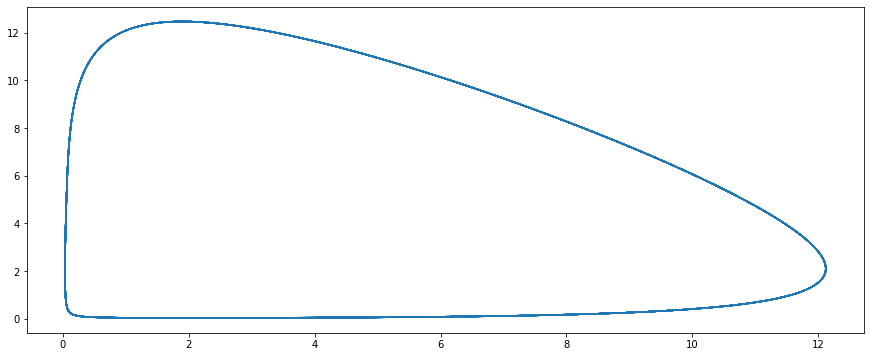

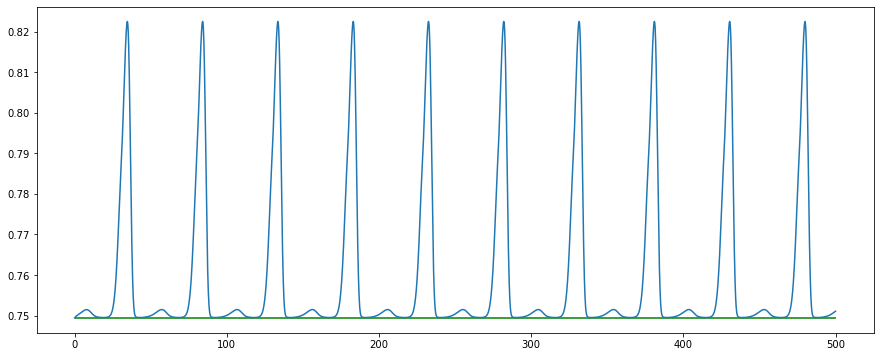

In [35]:
test_k_explicit(1e-1, 1/16, 1/2)

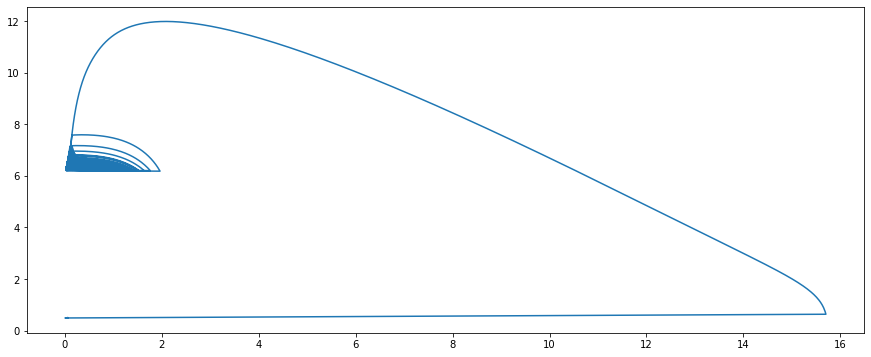

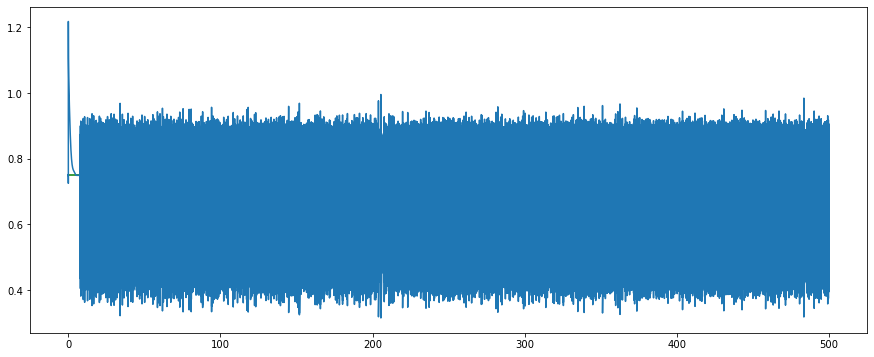

In [36]:
test_k_explicit(100, 1/16, 1/2, pas = 1e-2)

### Euler implicite

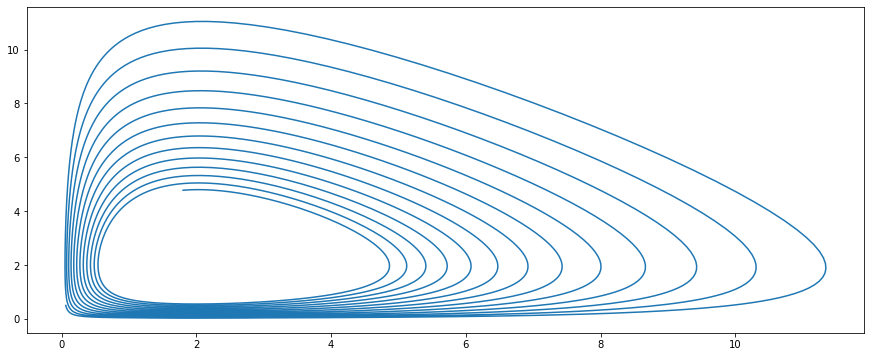

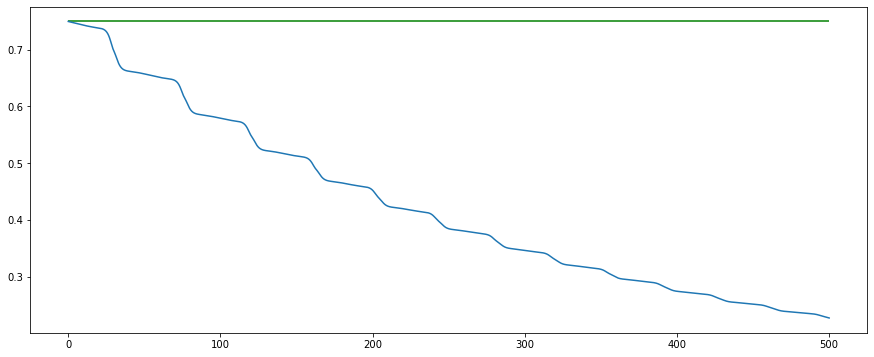

In [37]:
test_k_implicit(1e-5, 1/16, 1/2)

In [ ]:
test_k_implicit(1e-2, 1/16, 1/2)

In [ ]:
test_k_implicit(5, 4, 5, pas = 1)

Les conclusions sont les mêmes pour les deux schémas. $k$ doit être choisi en fonction des variations "naturelles" des schémas dues aux erreurs de calcul d'intégrales. S'il est pris trop petit, il ne peut pas compenser les décalages et se retrouve dans le même cas que sans modification. S'il est choisi trop grand, $k$ entraîne un décalage trop fort et la solution se décale de la ligne de niveau formée de $H$ pour se raccrocher à une autre courbe de niveau ou diverger.